# Une première classification 



0. Importez les librairies usuelles

In [1]:
import pandas as pd
import seaborn as sns

1. Téléchargez les données du dataset : ```ex2data1.txt``` et insérez les dans un dataframe 

In [2]:
df = pd.read_csv('../../src/ex2data1.txt', header=None)

In [3]:
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


2. Renommez respectivement les colonnes : 

"Col_1" / "Col_2" / "Target"

In [4]:
df.rename(columns={0:"Col_1", 1:"Col_2", 2:"Target"}, inplace=True)
df.head()

,Col_1,Col_2,Target
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


3. Visualisez les données sous la forme d’un nuage de point où les différentes classes sont indiquées par différents symboles

<AxesSubplot:xlabel='Col_1', ylabel='Col_2'>

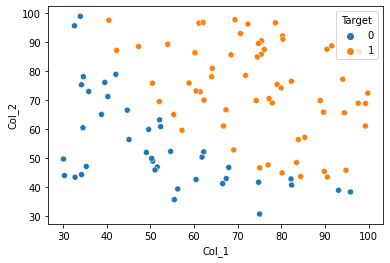

In [5]:
sns.scatterplot(data=df, x="Col_1", y="Col_2", hue="Target")

4. Séparez votre dataset en X pour les variables explicatives et y pour la variable d'entraînement 

In [6]:
target_variable = "Target"

X = df.loc[:, [column for column in df if column != target_variable]]
y = df.loc[:, [target_variable]]

5. Séparez les données en échantillon d’apprentissage et échantillon de validation grâce à la commande `from sklearn.model_selection import train_test_split`

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

6. Analysez les variables explicatives, y a t’il besoin de les normaliser ? si oui utiliser la fonction vue précédemment pour centrer réduire les variables explicatives.

In [8]:
from sklearn.preprocessing import StandardScaler
display(X.describe())

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

,Col_1,Col_2
count,100.000000,100.000000
mean,65.644274,66.221998
std,19.458222,18.582783
min,30.058822,30.603263
25%,50.919511,48.179205
50%,67.032988,67.682381
75%,80.212529,79.360605
max,99.827858,98.869436


7. Utilisez la régression logistique pour classer les données à votre disposition

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, KFold

model = LogisticRegression()

model.fit(X_train, Y_train)

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

8. Regardez votre score sur votre échantillon de test 

In [10]:
print(f"Train score : {model.score(X_train, Y_train)}, Test score : {model.score(X_test, Y_test)}")

Train score : 0.9125, Test score : 0.8


9. Regardez votre score moyen sur une cross-validation avec K=10

In [11]:
cross_val_score(model, X, y.values.ravel(), cv=KFold(10, shuffle=True, random_state=0)).mean()

0.8800000000000001

10. Produisez les prédictions de votre modèle pour l’echantillon d’apprentissage et l’échantillon test

In [15]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

11. Produisez la matrice de confusion pour vos prédictions sur l’échantillon de test et d’apprentissage, que dites vous des performances de votre modèle et son pouvoir de généralisation?

<AxesSubplot:>

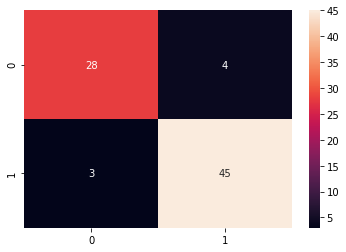

In [16]:
sns.heatmap(confusion_matrix(Y_train, Y_train_pred), annot=True, fmt="d")

<AxesSubplot:>

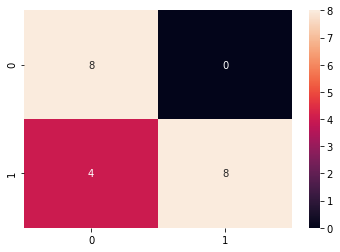

In [17]:
sns.heatmap(confusion_matrix(Y_test, Y_test_pred), annot=True, fmt="d")

12. Afficher la courbe ROC de votre modèle pour les données de validation

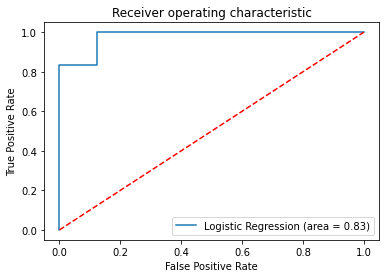

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

logit_roc_auc = roc_auc_score(Y_test.Target.values, Y_test_pred)
fpr, tpr, thresholds = roc_curve(Y_test.Target.values, model.predict_proba(X_test)[:,1]) 
"""on séléctionne la colonne 1 de predict proba car on a une colonne par classe de y
et qu'on a besoin e P(y=1)"""
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()